***Name: Bhandvalkar Atharva Dilip***

***Roll No.: 2447045***

***Batch: C***

**Problem Statement ->**

**Implement K-Means Clustering on Iris.csv dataset. Determine the number of clusters using the Elbow Method.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\SHREYAS\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
iris = pd.read_csv("Iris.csv")

In [3]:
iris.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
127,128,6.1,3.0,4.9,1.8,Iris-virginica
128,129,6.4,2.8,5.6,2.1,Iris-virginica
108,109,6.7,2.5,5.8,1.8,Iris-virginica
140,141,6.7,3.1,5.6,2.4,Iris-virginica
5,6,5.4,3.9,1.7,0.4,Iris-setosa
48,49,5.3,3.7,1.5,0.2,Iris-setosa
65,66,6.7,3.1,4.4,1.4,Iris-versicolor
105,106,7.6,3.0,6.6,2.1,Iris-virginica
81,82,5.5,2.4,3.7,1.0,Iris-versicolor


In [4]:
#elbow method:- used to find the optimal K in K-means clustering

In [5]:
iris.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
x = iris.drop(columns=["Id", "Species"], axis=1)

In [7]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
from sklearn.cluster import KMeans

In [9]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

C:\Users\SHREYAS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\SHREYAS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\SHREYAS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\SHREYAS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak o

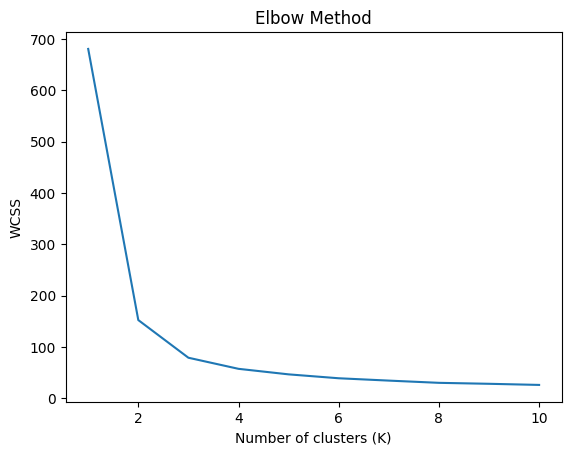

In [10]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.show()

In [11]:
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)

In [12]:
y_kmeans = kmeans.fit_predict(x)

C:\Users\SHREYAS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [13]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [14]:
iris['Cluster'] = y_kmeans
iris.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster
31,32,5.4,3.4,1.5,0.4,Iris-setosa,1
53,54,5.5,2.3,4.0,1.3,Iris-versicolor,0
144,145,6.7,3.3,5.7,2.5,Iris-virginica,2
101,102,5.8,2.7,5.1,1.9,Iris-virginica,0
123,124,6.3,2.7,4.9,1.8,Iris-virginica,0
62,63,6.0,2.2,4.0,1.0,Iris-versicolor,0
71,72,6.1,2.8,4.0,1.3,Iris-versicolor,0
127,128,6.1,3.0,4.9,1.8,Iris-virginica,0
109,110,7.2,3.6,6.1,2.5,Iris-virginica,2
27,28,5.2,3.5,1.5,0.2,Iris-setosa,1
